<a href="https://colab.research.google.com/github/yummyyayyay/Machine-Learning-Journey/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [ ]:
print(f"x_train.shape = {x_train.shape[0]}")
m = x_train.shape[0]
print(f"the number of training data = {m}")

# we could use len() as well instead of np.array.shape[] , shape returns a tuple with the length of each dimension of this multidimensional array

x_train.shape = 2
the number of training data = 2


In [ ]:
i = 0

x_i = x_train[0]
y_i = y_train[0]

print(f"(x^({i}),y^({i}) = ({x_i},{y_i}))")

(x^(0),y^(0) = (1.0,300.0))


In [ ]:
def compute_model(x,w,b):
  m = x.shape[0]
  f_wb = np.zeros(m)
  for i in range(m):
    f_wb[i] = w*x[i] + b

  return f_wb


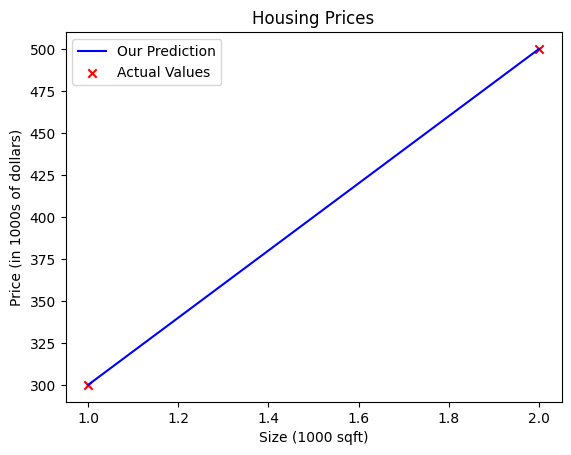

In [ ]:
# now that we have data , lets plot it using matplotlib.pyplot
# we will use the scatter method

temp_fwb = compute_model(x_train,200,100)

plt.plot(x_train, temp_fwb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [7]:
# Complete Implimentation of a linear regression model and finding the w,b values from gradient descent

import math,copy
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([1.0,2.0]) #features
y_train = np.array([300.0,500.0]) #targets


In [6]:
def compute_cost(x,y,w,b):
  m = x.shape[0]
  cost = 0

  for i in range(m):
    f_wb = w*x[i] + b

    cost = cost + (f_wb - y[i])**2
  total_cost = 1/(2*m)*cost
  return total_cost

In [5]:
def compute_gradient(x,y,w,b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w*x[i] + b
    dj_dw_i = (f_wb - y[i])*x[i]
    dj_db_i = (f_wb - y[i])
    dj_dw += dj_dw_i
    dj_db += dj_db_i

  dj_dw = dj_dw/m
  dj_db = dj_db/m

  return dj_dw,dj_db

In [16]:
def gradient_descent(x,y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
  """Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
  """

  J_history = []
  p_history = []

  b = b_in
  w = w_in

  for i in range(num_iters):
    dj_dw, dj_db = gradient_function(x, y, w , b)

    b = b - alpha * dj_db
    w = w - alpha * dj_dw

    if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
    if i% math.ceil(num_iters/10) == 0:
      print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
            f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
            f"w: {w: 0.3e}, b:{b: 0.5e}")

  return w, b, J_history, p_history #return w and J,w history for graphing

In [17]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


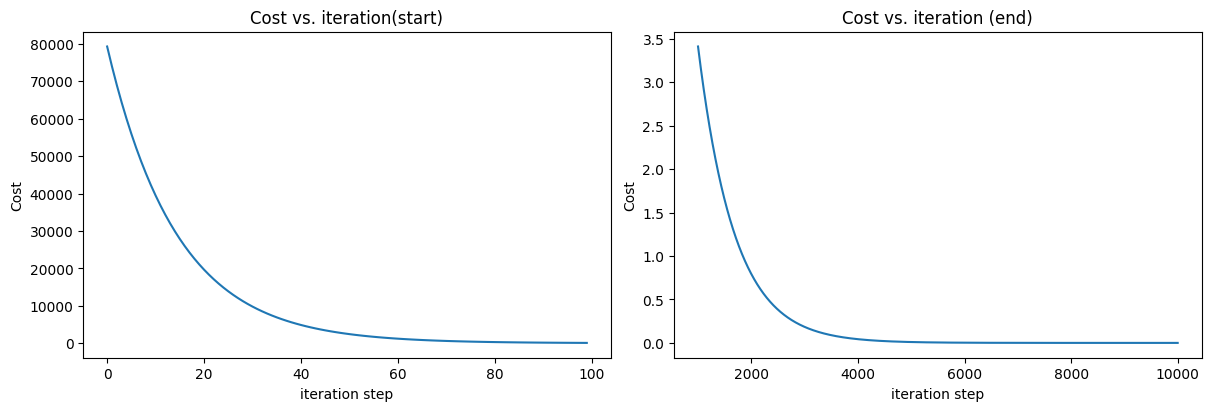

In [18]:
# plotting cost vs iterations to show how fast cost decreases in gradient descent

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

